In [1]:
import numpy as np
import nmresearch as nmr

In [2]:
4*(1-.08)-1.1

2.58

In [6]:
d0 = "delay0"
d0_def = "delay0=(d20-p1)/2"
d1 = "delay1"
d1_def = "delay1=d20-p1"
t1 = "tau1"
t1_def = "tau1=d3*(1+cnst1+2*cnst2)-p1/2"
t2 = "tau2"
t2_def = "tau2=d3*(1-cnst2)-p1"
t3 = "tau3"
t3_def = "tau3 = 2*d3*(1-cnst2)-p1"
t1p = "tau1p"
t1p_def = "tau1p = d3*2*(1-cnst1+2*cnst2)-p1"


pp = nmr.TwoPointCorrelator(use_magic=False)

pp.set_disorder_state("rZ", seq=pp.STABERYXX, cycles=5)
pp.set_prep_pattern([d0, d1, d1, d1, d0], [d0_def, d1_def])

pp.set_evolution(pp.WEI16)
pp.set_evo_pattern(
    [t1, t2, t3, t2, t1p, t2, t3, t2, t1], [t1_def, t2_def, t3_def, t1p_def]
)

pp.set_disorder_observable("rZ", seq=pp.STABERYXX, cycles=5)
pp.set_obs_pattern([d0, d1, d1, d1, d0], [d0_def, d1_def])

pp.generate_pulse_program(fc=12, T0=3, Tf=20)

; delay definitions
define delay delay0
"delay0=(d20-p1)/2"
define delay delay1
"delay1=d20-p1"
define delay tau1
"tau1=d3*(1+cnst1+2*cnst2)-p1/2"
define delay tau2
"tau2=d3*(1-cnst2)-p1"
define delay tau3 
"tau3 = 2*d3*(1-cnst2)-p1"
define delay tau1p 
"tau1p = d3*2*(1-cnst1+2*cnst2)-p1"
"l1=6"  ; start the evolution counter at 3

1   ze

2
d1 rpp1 rpp2 rpp3 rpp4 rpp6 rpp7 rpp8 rpp9 rpp11 rpp12 rpp13 rpp14
100u pl2:f2

(p1 ph0):f2
1.5u

3
delay0
(p1 ph1^):f2
delay1
(p1 ph2^):f2
delay1
(p1 ph3^):f2
delay1
(p1 ph4^):f2
delay0

lo to 3 times 15

(p1 ph5):f2
1.5u

4
tau1
(p1 ph6^):f2
tau2
(p1 ph7^):f2
tau3
(p1 ph8^):f2
tau2
(p1 ph9^):f2
tau1p
(p1 ph6^):f2
tau2
(p1 ph7^):f2
tau3
(p1 ph8^):f2
tau2
(p1 ph9^):f2
tau1

lo to 4 times l1

(p1 ph10):f2
1.5u

5
delay0
(p1 ph11^):f2
delay1
(p1 ph12^):f2
delay1
(p1 ph13^):f2
delay1
(p1 ph14^):f2
delay0

lo to 5 times 15

(p1 ph15):f2
1.5u

1m
(p1 ph30):f2

go=2 ph31
1m wr #0 if #0

iu1
iu1

25m ip10*192
25m ip11*192
25m ip12*192
25m ip13*192
25m ip1

In [16]:
90+62+3*16

200

In [4]:
c2 = 0.05
c1_lst = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06]
p1 = 1.02
d3 = 4

tau1 = (
    "{"
    + " ".join(
        ["{0:.8f}".format(1e-6 * (d3 * (1 + c1 + c2 * 2) - p1 / 2)) for c1 in c1_lst]
    )
    + "}"
)
tau2 = (
    "{"
    + " ".join(["{0:.8f}".format(1e-6 * (d3 * (1 - c2) - p1)) for c1 in c1_lst])
    + "}"
)
tau3 = (
    "{"
    + " ".join(["{0:.8f}".format(1e-6 * (2 * d3 * (1 - c2) - p1)) for c1 in c1_lst])
    + "}"
)
tau1p = (
    "{"
    + " ".join(
        ["{0:.8f}".format(1e-6 * (d3 * 2 * (1 - c1 + 2 * c2) - p1)) for c1 in c1_lst]
    )
    + "}"
)

In [5]:
print("define list<delay> tau1 = " + tau1)
print("define list<delay> tau2 = " + tau2)
print("define list<delay> tau3 = " + tau3)
print("define list<delay> tau1p = " + tau1p)

define list<delay> tau1 = {0.00000393 0.00000397 0.00000401 0.00000405 0.00000409 0.00000413}
define list<delay> tau2 = {0.00000278 0.00000278 0.00000278 0.00000278 0.00000278 0.00000278}
define list<delay> tau3 = {0.00000658 0.00000658 0.00000658 0.00000658 0.00000658 0.00000658}
define list<delay> tau1p = {0.00000770 0.00000762 0.00000754 0.00000746 0.00000738 0.00000730}


In [6]:
d0 = "delay0"
d0_def = "delay0=(d20-p1)/2"
d1 = "delay1"
d1_def = "delay1=d20-p1"
t1 = "tau1"
t1_def = "tau1=d3*(1+cnst1+2*cnst2)-p1/2"
t2 = "tau2"
t2_def = "tau2=d3*(1-cnst2)-p1"
t3 = "tau3"
t3_def = "tau3 = 2*d3*(1-cnst2)-p1"
t1p = "tau1p"
t1p_def = "tau1p = d3*2*(1-cnst1+2*cnst2)-p1"

In [7]:
def valid_config(c1,c2,p1,d3):
    return (2*d3*(1+c1+2*c2)-p1/2 > p1+1.5) and (d3*(1-c2)-p1 > p1+1.5) and (2*d3*(1-c2)-p1 > p1+1.5) and (d3*2*(1-c1+2*c2)-p1 > p1+1.5)

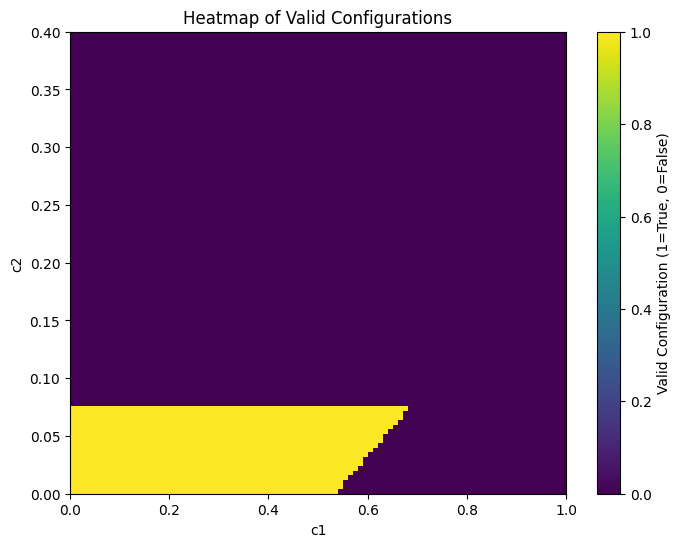

In [19]:
import numpy as np

import matplotlib.pyplot as plt

# Define the range of c1 and c2 values
c1_values = np.linspace(0, 1, 100)
c2_values = np.linspace(0, .4, 100)

# Create a 2D grid for c1 and c2
c1_grid, c2_grid = np.meshgrid(c1_values, c2_values)

# Evaluate valid_config for each combination of c1 and c2
valid_grid = np.vectorize(valid_config)(c1_grid, c2_grid, 1.1, 4)

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(valid_grid, extent=(0, 1, 0, .4), origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Valid Configuration (1=True, 0=False)')
plt.xlabel('c1')
plt.ylabel('c2')
plt.title('Heatmap of Valid Configurations')
plt.show()

In [9]:
t1 = "tau1"
t1_def = "tau1=d3*(1+cnst1+2*cnst2)-p1/2"
t2 = "tau2"
t2_def = "tau2=d3*(1-cnst2)-p1"
t3 = "tau3"
t3_def = "tau3 = 2*d3*(1-cnst2)-p1"
t1p = "tau1p"
t1p_def = "tau1p = d3*2*(1-cnst1+2*cnst2)-p1"


pp.set_global_state("Z")

pp.set_evolution(susp)
pp.set_evo_pattern(
    [t1, t2, t3, t2, t1p, t2, t3, t2, t1], [t1_def, t2_def, t3_def, t1p_def]
)

pp.set_global_observable("Z")

pp.generate_pulse_program(fc=14, evo_max=50)

State is already defined


NameError: name 'susp' is not defined